In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'IBM Plex Sans KR'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.size'] = 12

#### 여러 개의 그래프 그리기
+ subplot(행, 열, 번호)

In [7]:
x = [1,2,3,4,5]
y = [2,3,5,7,12]

#### 좌우로 그리기

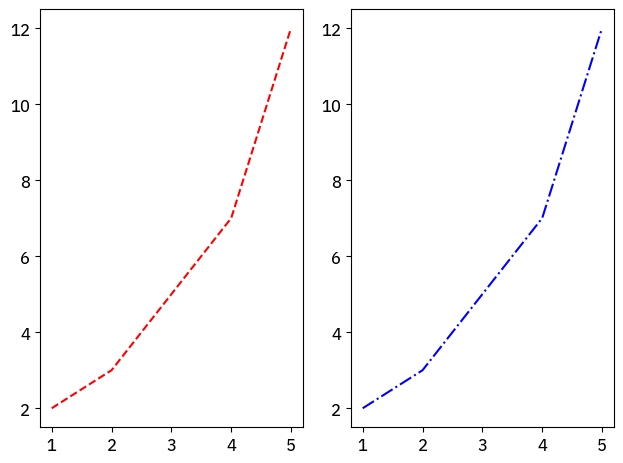

In [8]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')

plt.subplot(1, 2, 2)
plt.plot(x, y, 'b-.')

plt.tight_layout()

#### 위아래로 그리기

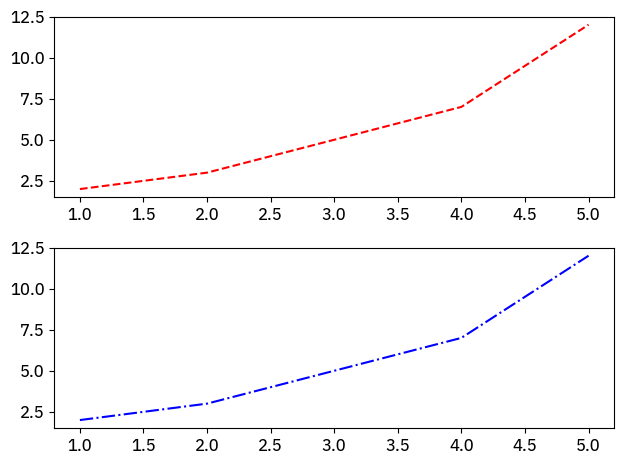

In [9]:
plt.subplot(211)
plt.plot(x, y, 'r--')

plt.subplot(212)
plt.plot(x, y, 'b-.')

plt.tight_layout()

#### 그래프 축 공유하기
* sharex, sharey 속성 이용

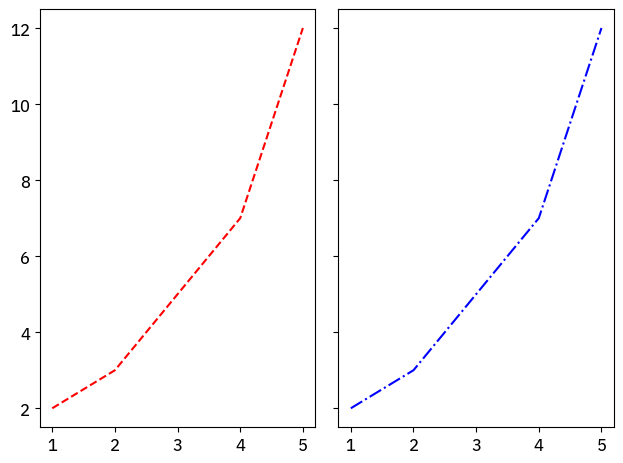

In [10]:
ax1 = plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)  # ax1의 y축 공유
plt.plot(x, y, 'b-.')
plt.yticks(visible=False)  # ax1의 y축 숨김

plt.tight_layout()

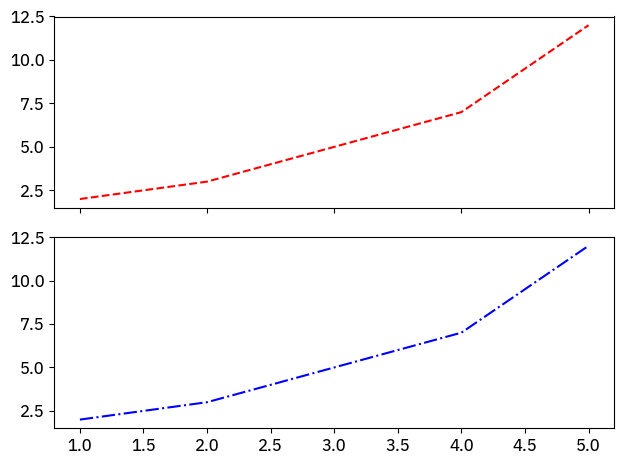

In [11]:
ax1 = plt.subplot(211, sharex=ax2)  # ax2의 x축 공유
plt.plot(x, y, 'r--')
plt.xticks(visible=False)  # ax1의 x축 숨김

ax2 = plt.subplot(212)  
plt.plot(x, y, 'b-.')

plt.tight_layout()

### 그래프에 텍스트 출력하기
+ text(x좌표, y좌표, 텍스트, 스타일)

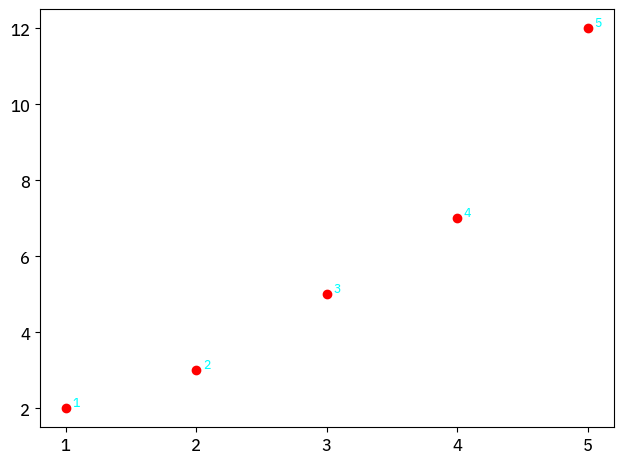

In [12]:
plt.plot(x, y, 'ro')
plt.xticks(np.arange(1, 5+1))

# 텍스트 출력시 스타일 지정
style = {'size':9, 'color':'cyan', 'weight':'bold'}

for i in range(5):
    plt.text(x[i] + 0.05, y[i] + 0.05, x[i], fontdict=style)

plt.tight_layout()

### 그래프에 텍스트 출력하기
+ annotate(텍스트, (x좌표, y좌표), 스타일)
+ 기존 text함수보다 다양한 기능 제공

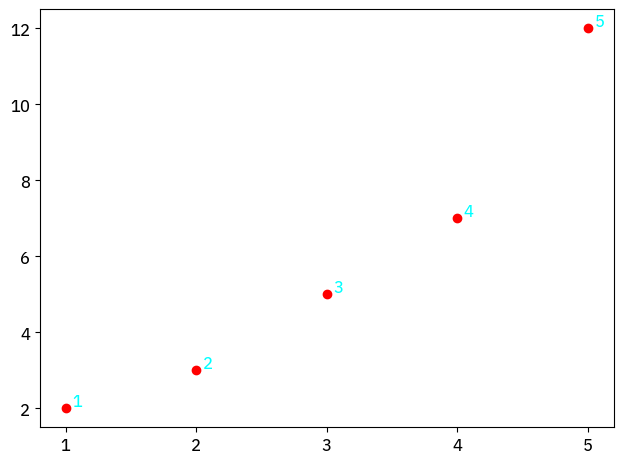

In [13]:
plt.plot(x, y, 'ro')
plt.xticks(np.arange(1, 5+1))

# 텍스트 출력시 스타일 지정
# style = {'size':9, 'color':'cyan', 'weight':'bold'}

for i in range(5):
    plt.annotate(x[i], (x[i] + 0.05, y[i] + 0.05), color='cyan', weight='bold', size=12)

plt.tight_layout()

#### 다양한 그래프 그리기
* pandas 객체를 이용해서 시각화
* matplotlib에서 제공하는 함수 이용

In [14]:
city = ['서울', '서울', '서울', '부산', '부산', '부산', '인천', '인천']
year = [2015, 2010, 2005, 2015, 2010, 2005, 2015, 2010]
pop = [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203]
region = ['수도권', '수도권', '수도권', '경상권', '경상권', '경상권', '수도권', '수도권']

In [15]:
data = {'도시':city, '년도':year, '인구':pop, '지역':region}
df = pd.DataFrame(data)

### 도시별 인구수 시각화

In [16]:
city_pop = df.groupby('도시')['인구'].sum()
city_pop

도시
부산    10354475
서울    29298340
인천     3153654
Name: 인구, dtype: int64

In [17]:
label = city_pop.index
index = np.arange(1, len(city_pop.index) +1)
label, index

(Index(['부산', '서울', '인천'], dtype='object', name='도시'), array([1, 2, 3]))

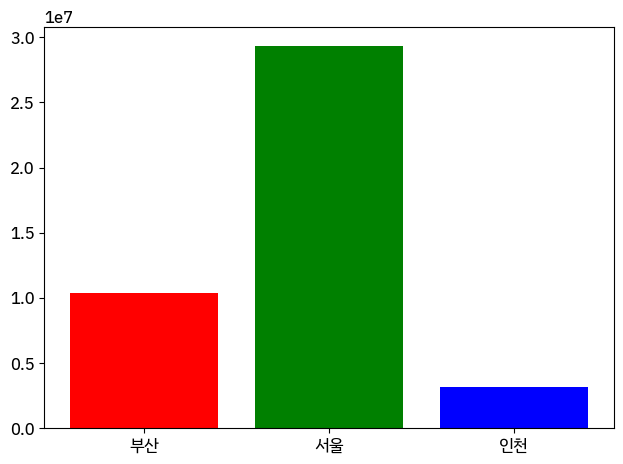

In [18]:
plt.bar(index, city_pop, color=['red', 'green', 'blue'])
plt.xticks(index, label)
plt.tight_layout()

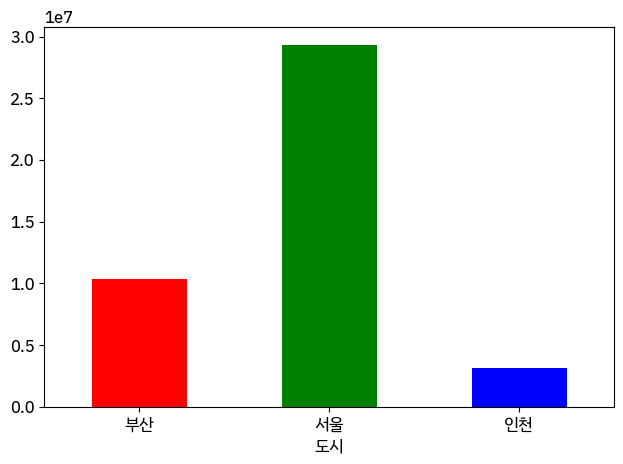

In [19]:
# pandas 객체에서 바로 시각화
city_pop.plot.bar(rot=0, color=['red', 'green', 'blue'])
plt.tight_layout()

#### 산점도 시각화
* scatter(x, y, 옵션들)

In [24]:
np.random.seed(2309131535)

x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.rand(50)

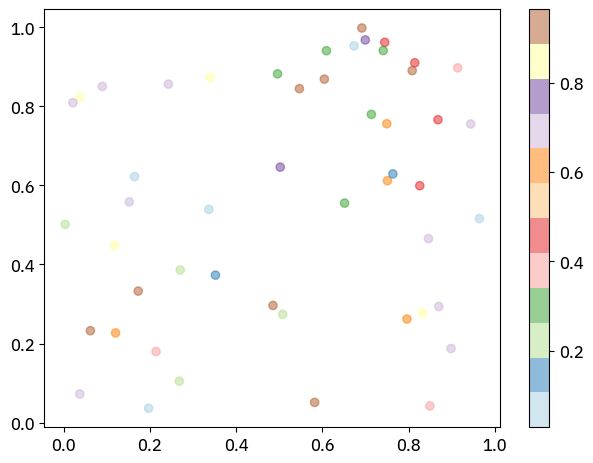

In [29]:
# 색상과 투명도, 칼라맵 지정
plt.scatter(x, y, c=colors, alpha=0.5, cmap='Paired')
plt.colorbar() # 칼라맵에 사용된 색상을 막대로 표시
plt.tight_layout()

#### 막대그래프 시각화
* bar(x, y, 옵션들)
* barh(x, y, 옵션들)

In [31]:
years = ['2020', '2021', '2022']
sales = [100, 400, 900]

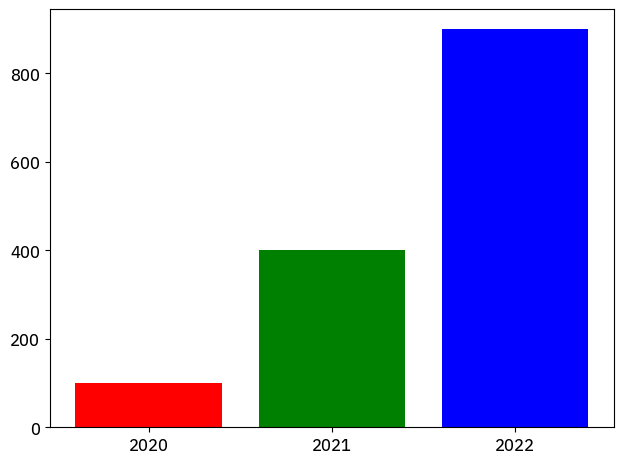

In [33]:
plt.bar(years, sales, color=['r', 'g', 'b'])
plt.tight_layout()

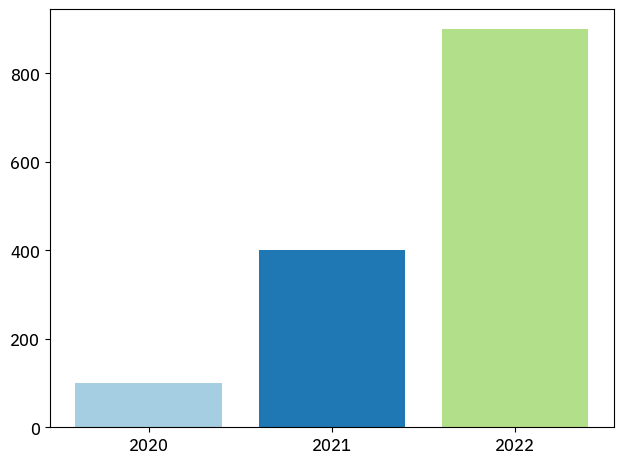

In [80]:
plt.bar(years, sales, color=plt.cm.Paired(np.arange(len(years))))
plt.tight_layout()

#### 막대그래프에 숫자 표시하기

TypeError: text() missing 1 required positional argument: 's'

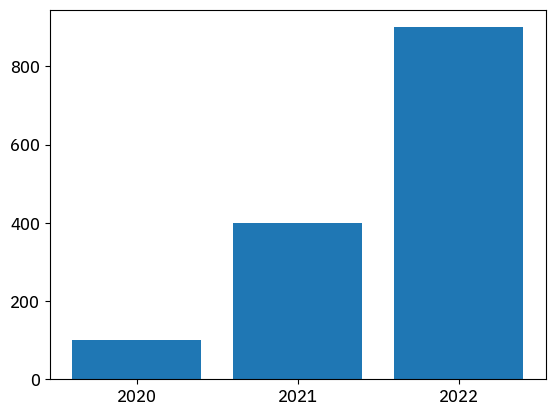

In [77]:
plt.bar(years, sales)

style = {'color':'blue'}

for i in range(len(sales)):
    plt.text(sales[i], (i - 0.1, sales[i] + 5), fontdict=style)
    
plt.tight_layout()

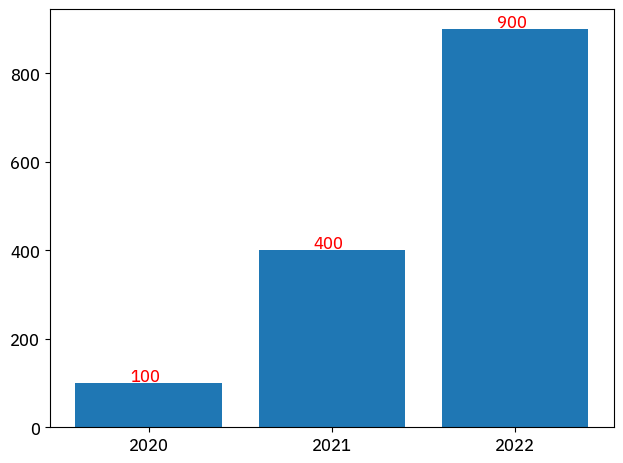

In [59]:
plt.bar(years, sales)

for i in range(len(sales)):
    plt.annotate(sales[i], (i - 0.1, sales[i] + 5), color='red')

plt.tight_layout()

#### 수평막대 그래프 그리기

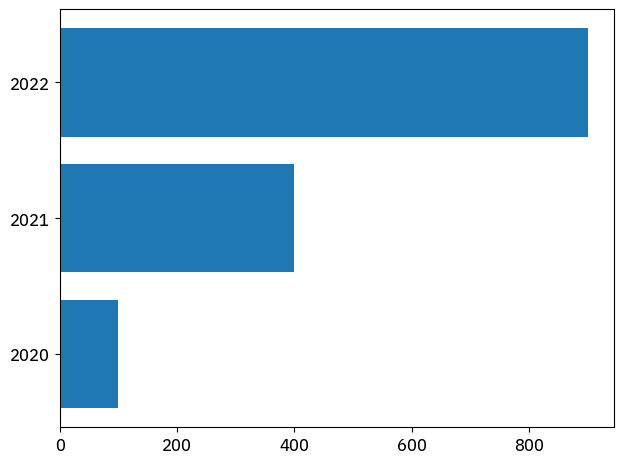

In [50]:
plt.barh(years, sales)
plt.tight_layout()

#### 막대그래프에 숫자 표시하기

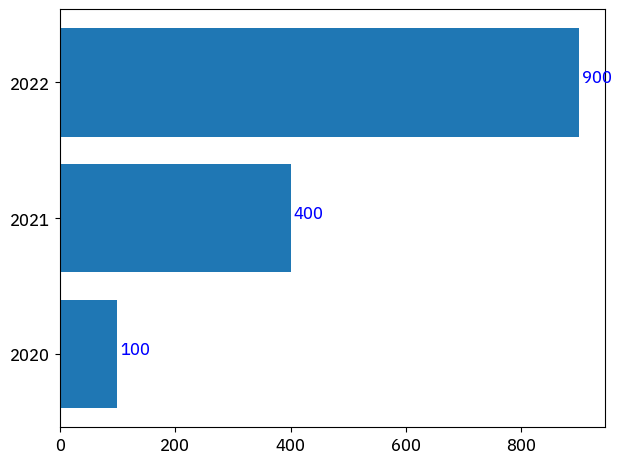

In [71]:
plt.barh(years, sales)

style = {'color':'blue'}

for i in range(len(sales)):
    plt.text(sales[i] + 5, i, sales[i], fontdict=style)
    
plt.tight_layout()

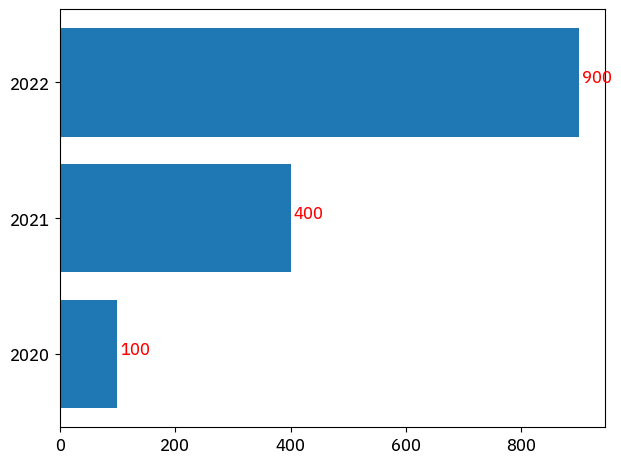

In [68]:
plt.barh(years, sales)

for i in range(len(sales)):
    plt.annotate(sales[i], (sales[i] + 5, i), color='red')

plt.tight_layout()

### 사원들의 직책별 평균 급여에 대한 결과를 막대그래프로 시각화

In [73]:
emp = pd.read_csv('./data/employees.csv')
emp.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0


In [87]:
jobid_sal = emp.groupby('JOB_ID')['SALARY'].mean().apply(lambda x : int(x))
jobid_sal.head()

JOB_ID
AC_ACCOUNT     8300
AC_MGR        12008
AD_ASST        4400
AD_PRES       24000
AD_VP         17000
Name: SALARY, dtype: int64

In [95]:
range(len(jobid_sal.index))

range(0, 19)

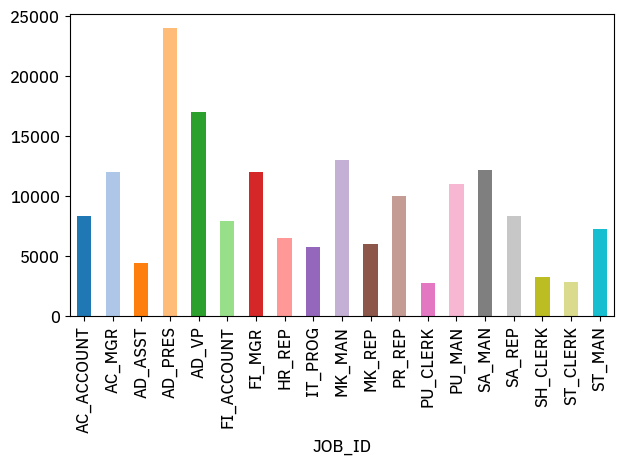

In [98]:
colors = range(len(jobid_sal.index))
jobid_sal.plot.bar(color=plt.cm.tab20(colors))
plt.ylabel('SALARY')
plt.tight_layout()